In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sbidata=pd.read_excel('sbi insurance.xlsx')

In [3]:
sbidata.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.0,0.0,27.90,0.0,1.0,3.0,16884.9240,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,1.0,33.77,1.0,0.0,2.0,1725.5523,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=sbidata.dropna(axis=0)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1,19.0,0.0,27.900,0.0,1.0,3.0,16884.92400,1.0
3,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230,1.0
5,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200,0.0
7,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061,0.0
9,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520,1.0


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
data.groupby(['sex']).count()

,age,bmi,children,smoker,region,charges,insuranceclaim
sex,,,,,,,
0.0,662,662,662,662,662,662,662
1.0,676,676,676,676,676,676,676


In [9]:
data.groupby(['children']).count()

,age,sex,bmi,smoker,region,charges,insuranceclaim
children,,,,,,,
0.0,574,574,574,574,574,574,574
1.0,324,324,324,324,324,324,324
2.0,240,240,240,240,240,240,240
3.0,157,157,157,157,157,157,157
4.0,25,25,25,25,25,25,25
5.0,18,18,18,18,18,18,18


In [10]:
data.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges,insuranceclaim
smoker,,,,,,,
0.0,1064,1064,1064,1064,1064,1064,1064
1.0,274,274,274,274,274,274,274


In [11]:
data.groupby(['region']).count()

,age,sex,bmi,children,smoker,charges,insuranceclaim
region,,,,,,,
0.0,324,324,324,324,324,324,324
1.0,325,325,325,325,325,325,325
2.0,364,364,364,364,364,364,364
3.0,325,325,325,325,325,325,325


In [12]:
data.groupby(['insuranceclaim']).count()

,age,sex,bmi,children,smoker,region,charges
insuranceclaim,,,,,,,
0.0,555,555,555,555,555,555,555
1.0,783,783,783,783,783,783,783


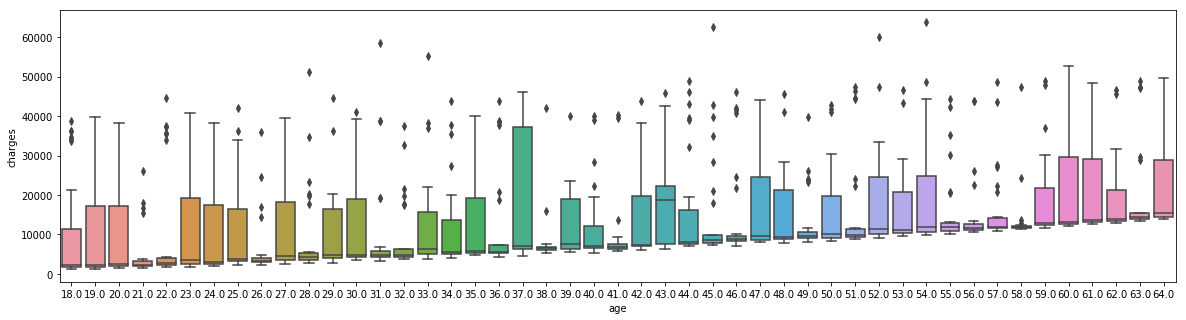

In [13]:
fig = plt.figure(figsize = (20,5))
sns.boxplot(x='age' , y='charges' , data = data)

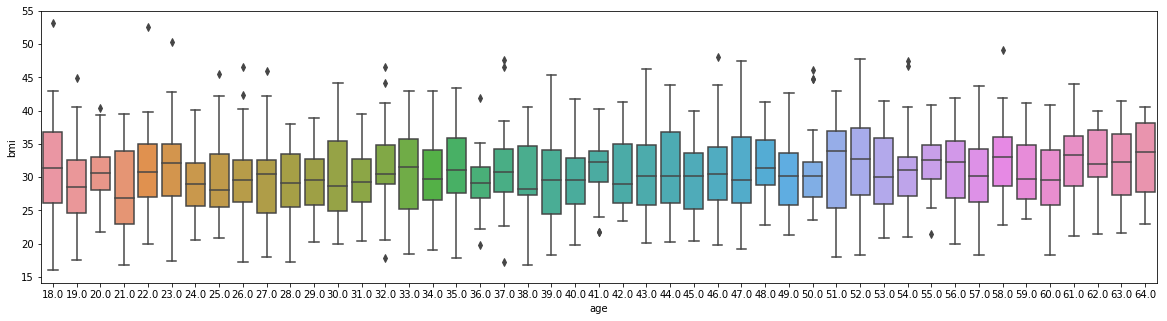

In [14]:
fig = plt.figure(figsize = (20,5))
sns.boxplot(x='age' , y='bmi' , data = data)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=data.iloc[:,0:7].values
y=data.iloc[:,7].values

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 7)
(1070,)
(268, 7)
(268,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[ 62  30]
 [ 28 148]]
78.35820895522389


C:\Users\dhirendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[ 90   2]
 [  2 174]]
98.50746268656717


In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[ 79  13]
 [ 67 109]]
70.1492537313433


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[ 85   7]
 [ 17 159]]
91.04477611940298


C:\Users\dhirendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[ 85   7]
 [ 17 159]]
91.04477611940298


C:\Users\dhirendra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#as we can see desion tree gives maximum score 98.5 